In [73]:
import keras.layers
from tensorflow import keras
import tensorflow as tf

In [74]:
# Path to images
path_to_images = "training-data/dataset1/known_images"

In [75]:
train_dataset, val_dataset = keras.utils.image_dataset_from_directory(
    path_to_images,
    class_names=["normal", "sick"],
    batch_size = 32,
    image_size=(395, 488),
    validation_split=0.2,
    subset="both",
    seed=200
)

Found 715 files belonging to 2 classes.
Using 572 files for training.
Using 143 files for validation.


In [76]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2)
    ]
)

In [77]:
# Create input shape
inputs = keras.Input(shape=(395, 488, 3))

# Data augmentation
x = data_augmentation(inputs)

# Normalize the features from (0 -255) to (0 -1)
x = keras.layers.Rescaling(1./255)(x)

# Create a convolutional layer with max pooling
x = keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Flatten()(x)

# Dropout
x = keras.layers.Dropout(0.5)(x)

# Create the model output
outputs = keras.layers.Dense(1, activation="sigmoid")(x)


In [78]:
model = keras.Model(inputs=inputs, outputs=outputs, name="Chest_Opacities_Detection")

In [79]:
model.summary()

Model: "Chest_Opacities_Detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 395, 488, 3)]     0         
                                                                 
 conv2d_60 (Conv2D)          (None, 393, 486, 256)     7168      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 196, 243, 256)    0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 12192768)          0         
                                                                 
 dropout_1 (Dropout)         (None, 12192768)          0         
                                                                 
 dense_13 (Dense)            (None, 1)                 12192769  
                                         

In [80]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=['accuracy']
)

In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/chest_opacities_detection_model_V1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [82]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
18/18 [==============================] - 534s 29s/step - loss: 2959.1899 - accuracy: 0.7430 - val_loss: 52.2584 - val_accuracy: 0.9091
Epoch 2/30
18/18 [==============================] - 413s 23s/step - loss: 52.0672 - accuracy: 0.8864 - val_loss: 11.9976 - val_accuracy: 0.9441
Epoch 3/30
18/18 [==============================] - 315s 17s/step - loss: 9.9600 - accuracy: 0.9336 - val_loss: 2.6129 - val_accuracy: 0.9510
Epoch 4/30
18/18 [==============================] - 263s 15s/step - loss: 1.0679 - accuracy: 0.9843 - val_loss: 1.9840 - val_accuracy: 0.9790
Epoch 5/30
18/18 [==============================] - 265s 15s/step - loss: 376.1442 - accuracy: 0.7290 - val_loss: 54.6175 - val_accuracy: 0.8252
Epoch 6/30
18/18 [==============================] - 277s 15s/step - loss: 292.0463 - accuracy: 0.8094 - val_loss: 637.1909 - val_accuracy: 0.6573
Epoch 7/30
18/18 [==============================] - 311s 17s/step - loss: 251.0313 - accuracy: 0.7902 - val_loss: 80.5474 - val_accurac

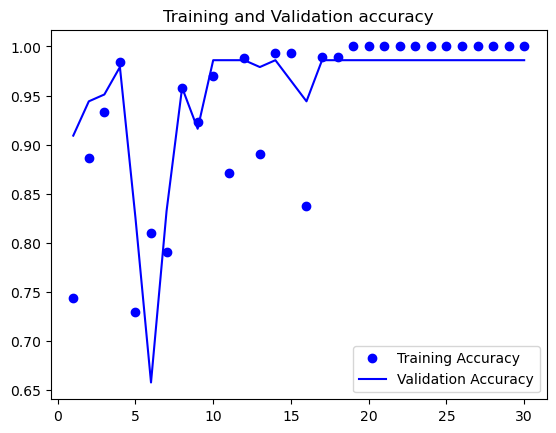

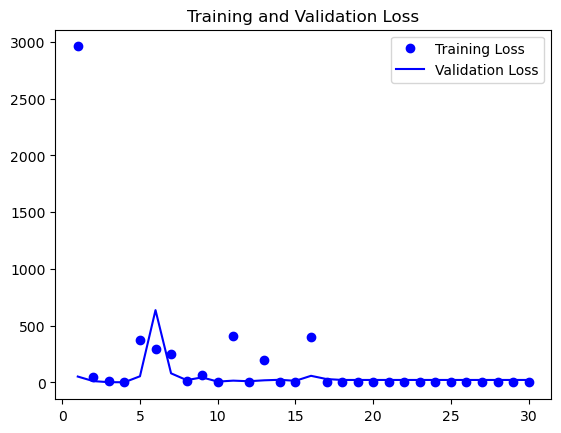

<Figure size 640x480 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()
plt.show()

In [6]:
import os
import csv
import numpy as np
from tensorflow import keras


path_to_dataset_2 = "training-data/dataset2/images"

test_dataset = keras.utils.image_dataset_from_directory(
    path_to_dataset_2,
    class_names=["normal", "sick"],
    batch_size=32,
    image_size=(395, 488),
)
test_model = keras.models.load_model("models/chest_opacities_detection_model_v1.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.3f} and Test loss: {test_loss:.3f}")

Found 224 files belonging to 2 classes.
7/7 [==============================] - 34s 5s/step - loss: 184.7191 - accuracy: 0.4688
Test accuracy: 0.469 and Test loss: 184.719
